In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import  Embedding, SimpleRNN, LSTM,Masking,Bidirectional
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.models import model_from_json,model_from_yaml,load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence,text
from sklearn.preprocessing import LabelEncoder
from keras import metrics, regularizers
from keras.optimizers import RMSprop
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.
C:\Users\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [3]:
# Data yükleme, boş satıları silme, aynı satıları temizleme, silinen satırlardan dolayı bozulan indexsi yeniden yaratma
X_train = pd.read_excel('./hepsi-X_train.xlsx')
X_test=pd.read_excel('./hepsi-X_test.xlsx')
y_train=pd.read_excel('./hepsi-y_train.xlsx')
y_test=pd.read_excel('./hepsi-y_test.xlsx')


In [4]:
len(X_train)

1503

In [5]:
len(X_test)

168

In [6]:
X_train[10:50]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
10,263,1,1607,0,0,0,0,0,0,0,0,0,0,0,0
11,3066,3067,369,29,16,3068,1,34,3069,100,1549,3070,194,0,0
12,1,2263,1268,831,856,13,370,12,0,0,0,0,0,0,0
13,1,3,2686,2687,2688,53,2689,2690,2691,0,0,0,0,0,0
14,543,13,4059,4060,320,1765,4061,4062,16,608,134,422,252,13,329
15,745,1578,316,143,559,5858,5859,5860,5861,0,0,0,0,0,0
16,1,30,13,30,3,0,0,0,0,0,0,0,0,0,0
17,90,2002,106,484,56,151,485,131,1,107,224,2003,787,1166,253
18,154,5736,128,624,473,14,19,55,192,5737,218,5738,385,1917,5739
19,4,1,406,23,1987,1160,1161,105,781,595,0,0,0,0,0


In [7]:
# Model için gerekli değerler
#epochs_sayisi=5
batch_size=8
# Çıktı gözükmemesi için
verbose=1
validation_split=0.1
max_len=15

vocab_size=10000

In [8]:
def rnn(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    #model.add(SimpleRNN(128,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(SimpleRNN(64,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    #model.add(Dropout(0.2))
    model.add(SimpleRNN(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001), metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    return history,model

In [9]:
def lstm(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    #model.add(LSTM(128,activation='relu',return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(LSTM(64,activation='relu',return_sequences=True))
    #model.add(Dropout(0.2))
    model.add(LSTM(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    return history,model

In [10]:
def bilstm(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    #model.add(LSTM(128,activation='relu',return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(LSTM(64,activation='relu',return_sequences=True))
    #model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(4,activation='relu',kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    return history,model

In [11]:
def cnn(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    #model.add(Conv1D(128,1,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Conv1D(64,1,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Conv1D(32,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(16,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(4,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    return history,model
    #model.summary()

In [12]:
def test(algoritma,model):
    #Hiç eğitime sokulmamış veri ile test
    test=model.evaluate(X_test, y_test, verbose=0)
    print("\n\nTest %s modelinde test %s: %.2f%% --- %s: %.2f%%" % (algoritma,model.metrics_names[1], test[1]*100,model.metrics_names[0], test[0]*100))


In [40]:
from keras import backend as K
curr_session = tf.get_default_session()
if curr_session is not None:
    curr_session.close()
K.clear_session()
s = tf.InteractiveSession()
K.set_session(s)
epoch_sayisi=int(input("Eposh sayisini giriniz..:"))

print('''
    Uygulanacak algoritmayı seçiniz:
    1 - CNN
    2 - RNN
    3 - LSTM
    4 - BiLSTM
    ''')

algoritma=input("Seçim:")
if(algoritma=="cnn"):
    history,model=cnn(epoch_sayisi)
elif(algoritma=="rnn"):
    history,model=rnn(epoch_sayisi)
elif(algoritma=="lstm"):
    history,model=lstm(epoch_sayisi)
elif(algoritma=="bilstm"):
    history,model=bilstm(epoch_sayisi)
print("**** %s modelinde %s epochluk Acc %.2f  Loss %.2f" %(algoritma,epoch_sayisi,history.history['acc'][epoch_sayisi-1]*100,history.history['loss'][epoch_sayisi-1]*100))

rnn_test=test(algoritma,model)


Eposh sayisini giriniz..: 10



    Uygulanacak algoritmayı seçiniz:
    1 - CNN
    2 - RNN
    3 - LSTM
    4 - BiLSTM
    


Seçim: cnn


Train on 1352 samples, validate on 151 samples
Epoch 1/10
1352/1352 [==============================] - 1s 680us/step - loss: 0.6834 - acc: 0.8528 - val_loss: 0.5346 - val_acc: 0.8477
Epoch 2/10
1352/1352 [==============================] - 1s 498us/step - loss: 0.4755 - acc: 0.8528 - val_loss: 0.4549 - val_acc: 0.8477
Epoch 3/10
1352/1352 [==============================] - 1s 494us/step - loss: 0.4372 - acc: 0.8528 - val_loss: 0.4358 - val_acc: 0.8477
Epoch 4/10
1352/1352 [==============================] - 1s 499us/step - loss: 0.4169 - acc: 0.8528 - val_loss: 0.4181 - val_acc: 0.8477
Epoch 5/10
1352/1352 [==============================] - 1s 496us/step - loss: 0.3942 - acc: 0.8528 - val_loss: 0.4146 - val_acc: 0.8477
Epoch 6/10
1352/1352 [==============================] - 1s 491us/step - loss: 0.3786 - acc: 0.8528 - val_loss: 0.4007 - val_acc: 0.8477
Epoch 7/10
1352/1352 [==============================] - 1s 513us/step - loss: 0.3630 - acc: 0.8587 - val_loss: 0.3991 - val_acc: 0.8609
E

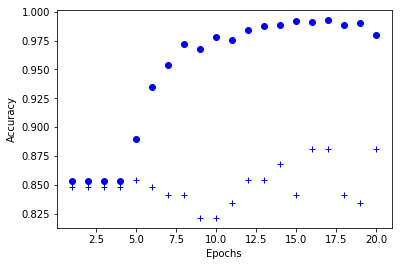

In [39]:
import matplotlib.pyplot as plt
import time
epochs = range(1, epoch_sayisi+1)
Acc = history.history['acc']
Val_acc =history.history['val_acc']
plt.plot(epochs, Acc, 'bo', label='Acc')
plt.plot(epochs, Val_acc, 'b+', label='Vall Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
time.sleep(1)
plt.show()

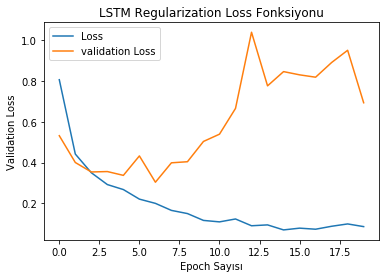

In [38]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title(algoritma.upper() + ' Regularization Loss Fonksiyonu')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch Sayısı')
plt.legend(loc="upper left")
#plt.savefig("%s-%s.png" %(algoritma,epoch_sayisi))
plt.show()


In [ ]:
acc=[]